In [1]:
f2_dir='/home/subhajit/Desktop/EPTAWM/Data/DR2new/chains_42_yanjun/crn_pl/'
ent_dir='/home/subhajit/Desktop/EPTAWM/Data/DR2new/chains_ep_chen/crn_pl/'

In [2]:
term='crn_pl'

In [3]:
script_loc='/home/subhajit/Desktop/EPTAWM/'
import sys, os
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append(script_loc)
from diff_chain import  Diff_chain_shift

2023-06-09 17:30:14.964551: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 17:30:14.993248: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 17:30:14.993644: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 17:30:15.486005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
par_f2=pd.read_csv(f2_dir+'CURN_PL_nf9_flinear9_25PSR_DE440_PTMCMC_parname.txt', header = None)
lt=len(par_f2)
#par_f2

In [8]:
f2_1=np.loadtxt(f2_dir+'chain_1.txt',usecols=(1,0,-4))

In [12]:
par_ent=pd.read_csv(ent_dir+'pars.txt', header = None)
lf=len(par_ent)
par_ent

,0
0,J0030+0451_red_noise_gamma
1,J0030+0451_red_noise_log10_A
2,J0613-0200_dm_gp_gamma
3,J0613-0200_dm_gp_log10_A
4,J0751+1807_dm_gp_gamma
...,...
62,J2124-3358_dm_gp_log10_A
63,J2322+2057_red_noise_gamma
64,J2322+2057_red_noise_log10_A
65,gw_crn_gamma


In [13]:
ent_1=np.loadtxt(ent_dir+'chain_1.txt',usecols=(lf-2,lf-1,-4))

In [14]:
f2=f2_1.T[0:2];ent=ent_1.T[0:2]

In [18]:
names_red = ['gamma','logA']
labels_red=['\gamma','\log A']
del_names=['delta_gamma','delta_logA']

In [19]:
f2_red=MCSamples(samples=np.array(f2).transpose(),loglikes=f2_1.T[-1],names=names_red,labels=labels_red,label='FORTYTWO')
ent_red=MCSamples(samples=np.array(ent).transpose(),loglikes=ent_1.T[-1],names = names_red,labels=labels_red,label='ENTERPRISE')


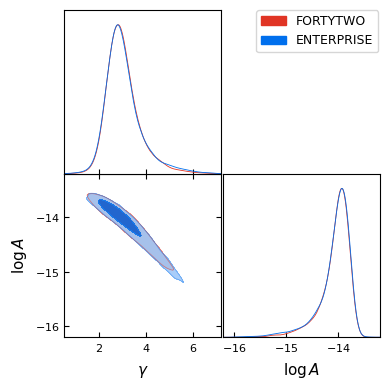

In [20]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([f2_red,ent_red], filled=True)
plt.savefig(term+'_f2_ent.png',dpi=300)
plt.show()

In [21]:
diff_chain_red, nsig_red,sigl_red,sigu_red=Diff_chain_shift(f2_red,ent_red)

In [22]:
# %matplotlib inline
# 

# g = plots.get_subplot_plotter()
# #nsig=utilities.from_confidence_to_sigma(shift_probability)
# #getdist.plots.GetDistPlotSettings()
# g.triangle_plot(diff_chain_red, filled=True,legend_labels = ['$\Delta_T=$'+
#                         str("{:.5f}".format(nsig_red))],markers=[0,0,0,0])

# plt.savefig('diff_trimvsfull_'+term+'.png',dpi=300)

In [23]:
def plot_diff_chain(A1,A2,lims=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig_red)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.4f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig('crn_pl_trim_'+A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability
    

(<getdist.mcsamples.MCSamples at 0x7f218d4891f0>, 0.005001667222407468)

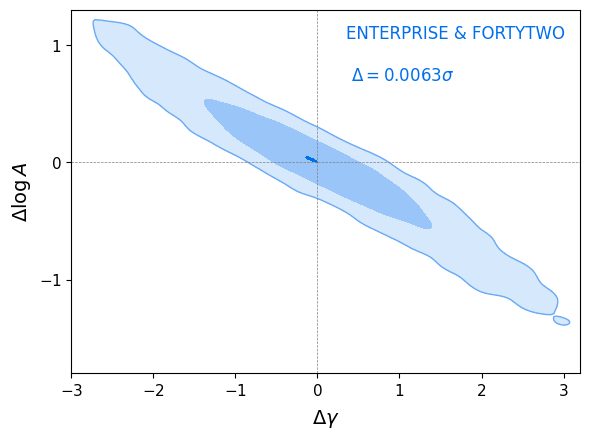

In [25]:
plot_diff_chain(ent_red,f2_red,lims=[-3,3.2,-1.8,1.3])